# Homework 2

## Problem 1 -  Dollar Profits
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- dollarpos variable below is a DataFrame containing randomly generated initial dollar positions in each symbol at the close of market the prior day. 
- Compute the dollar profit in each symbol on a given day as a DataFrame
- Plot the cumulative dollar profit in A through time

<Axes: >

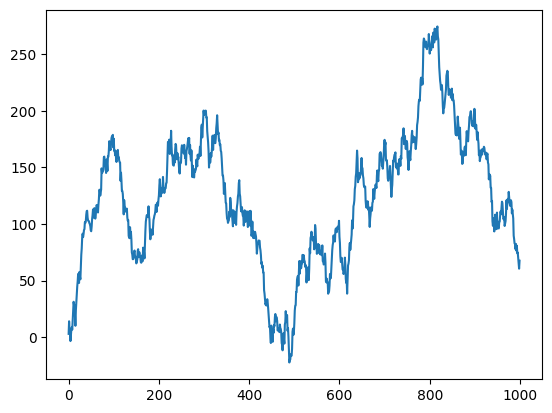

In [11]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

dollarpos = np.random.normal(1000,100, (1000,5))
dollarpos = pd.DataFrame(dollarpos,columns = columns).abs()

ans = rets * dollarpos

cummprofit = ans['A'].cumsum()
cummprofit.plot()

## Problem 2 - Performance Stats 
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- Please complete the function "compute_stats".
- compute_stats takes as input rets and returns a new DataFrame (stats) containing performance stats as specified below. rows of the result should be symbols and columns the performance stat label.
    1. "avg": average return (annualized)
    2. "vol": volatility (annualized)
    3. "sharpe": sharpe ratio (annualzied)
    4. "hit_rate": percent of returns which are positive
- Plot the sharpe ratios in "stats" in ascending order.

In [12]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

<Axes: >

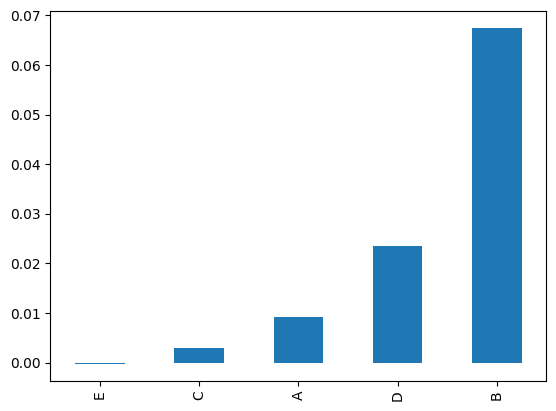

In [24]:
def compute_stats(rets):
    # fill out the body here
    # return a DataFrame "stats"
    # columns should be performance stat label
    # rows should be symbols
    avg = rets.mean()
    std = rets.std()
    rf = 0
    sharpe = (avg - rf)/std
    pos_ret = (rets > 0).sum()
    neg_ret = (rets <= 0).sum()
    hit_rate = 100 * pos_ret / (neg_ret + pos_ret)
    stats = pd.DataFrame()
    stats['avg'] = avg
    stats['vol'] = std
    stats['sharpe'] = sharpe
    stats['hit_rate'] = hit_rate
    return stats

stats = compute_stats(rets)
stats['sharpe'].sort_values().plot(kind='bar')

## Problem 3 - Simple Reversal Signal
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols
- Please complete the function "reversal_signal"
- reversal_signal takes as input rets and returns a new DataFrame (signal) which has the same rows/columns as rets. The values of signal are 1 if the symbol had the worst return that day, -1 if it had the best return, and 0 otherwise. 
- plot the value of signal through time for "A"

Hint: Try to construct a boolean DataFrame first and then convert it to an integer DataFrame

In [25]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

<Axes: >

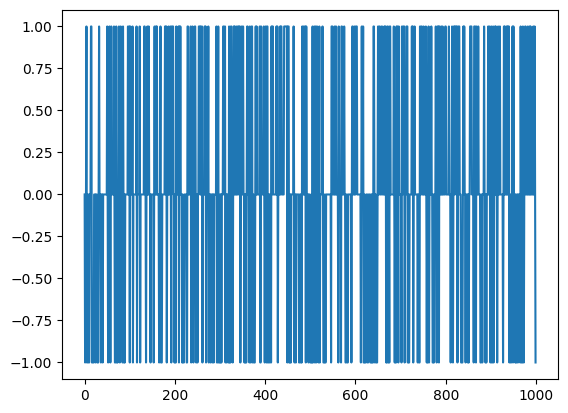

In [47]:
def reversal_signal(rets):
    # fill out the body here
    # return a DataFrame "signal"
    # signal has same index/columns as rets
    # the value in signal is  1 if the symbol had the worst return on
    # a particular day, -1 if it had the best, and 0 otherwise
    signal = rets - rets
    ranked = rets.rank(1,method='first')
    is_max = (ranked == rets.shape[1]) * 1
    is_min = (ranked == 1) * 1
    return is_min - is_max

signal = reversal_signal(rets)
signal['A'].plot()